In [1]:
# built it
import sys
sys.path.insert(0, '/Users/slaw/osobiste/trading')

# custom
import gpw_data
import signal_generator
from strategies.strategy_3 import CONFIG as s3_config

In [2]:
# to allow zoom plots
%matplotlib notebook

In [3]:
print(s3_config)

{'rules': [{'id': 'filter_1', 'type': 'simple', 'ts': 'close', 'lookback': 56, 'params': {'b': 0.02}, 'func': <function support_resistance at 0x11a222200>}, {'id': 'filter_2', 'type': 'simple', 'ts': 'close', 'lookback': 7, 'params': {'b': 0.015}, 'func': <function support_resistance at 0x11a222200>}, {'id': 'filter_rule_extended', 'type': 'convoluted', 'simple_rules': ['filter_1', 'filter_2'], 'aggregation_type': 'state-based', 'aggregation_params': {'long': [{'filter_1': 1, 'filter_2': 1}], 'short': [{'filter_1': -1, 'filter_2': -1}], 'neutral': [{'filter_1': 0, 'filter_2': 0}]}}, {'id': 'filter_rule_binary', 'type': 'convoluted', 'simple_rules': ['filter_1'], 'aggregation_type': 'state-based', 'aggregation_params': {'long': [{'filter_1': 1}], 'short': [{'filter_1': -1}]}}], 'strategy': {'type': 'fixed', 'strategy_rules': ['filter_rule_binary'], 'constraints': {'hold_x_days': 28, 'wait_entry_confirmation': 7}}}


In [4]:
data_collector = gpw_data.GPWData(pricing_data_path='../pricing_data')
df = data_collector.load(symbols='CCC', from_csv=True)
df.head(5)

,open,high,low,close,volume
date,,,,,
2004-12-02,10.10,10.25,9.85,9.95,252192
2004-12-03,9.95,9.95,9.45,9.80,47657
2004-12-06,9.75,9.75,9.50,9.60,24404
2004-12-07,9.50,9.50,9.15,9.40,22520
2004-12-08,9.40,9.40,9.10,9.35,11571


In [5]:
sg = signal_generator.SignalGenerator(
    df = df,
    config = s3_config,
    debug=True
)
df_signals = sg.generate()

In [6]:
df_signals.head(5)

,open,high,low,close,volume,entry_long,exit_long,entry_short,exit_short
date,,,,,,,,,
2004-12-02,10.10,10.25,9.85,9.95,252192,0.0,0.0,0.0,0.0
2004-12-03,9.95,9.95,9.45,9.80,47657,0.0,0.0,0.0,0.0
2004-12-06,9.75,9.75,9.50,9.60,24404,0.0,0.0,0.0,0.0
2004-12-07,9.50,9.50,9.15,9.40,22520,0.0,0.0,0.0,0.0
2004-12-08,9.40,9.40,9.10,9.35,11571,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


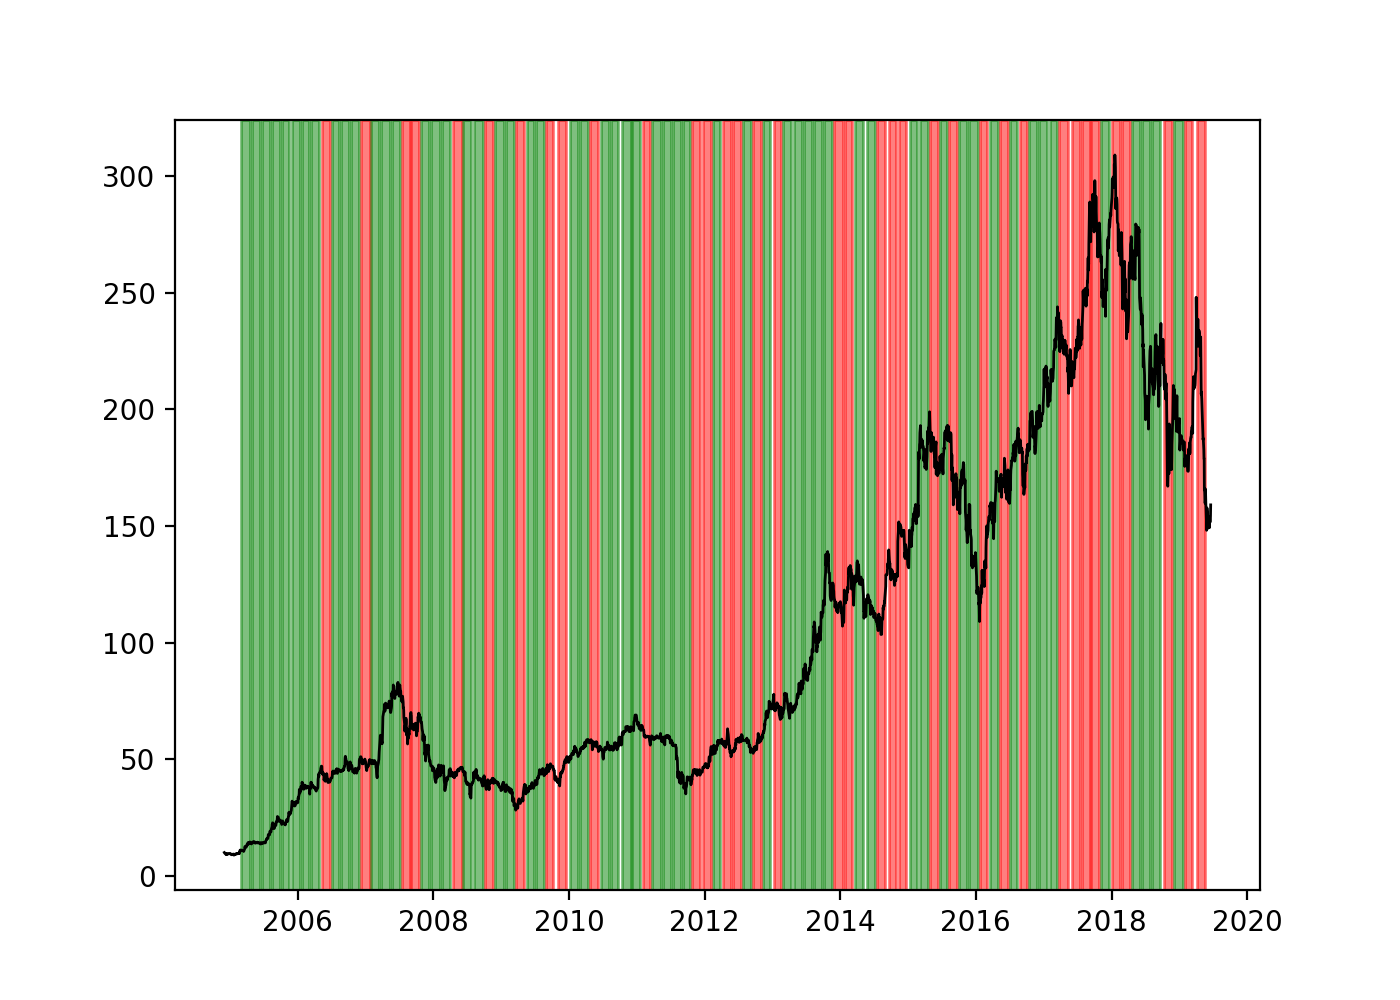

In [10]:
sg.plot_strategy_result(df_signals, price_label='close')

<IPython.core.display.Javascript object>


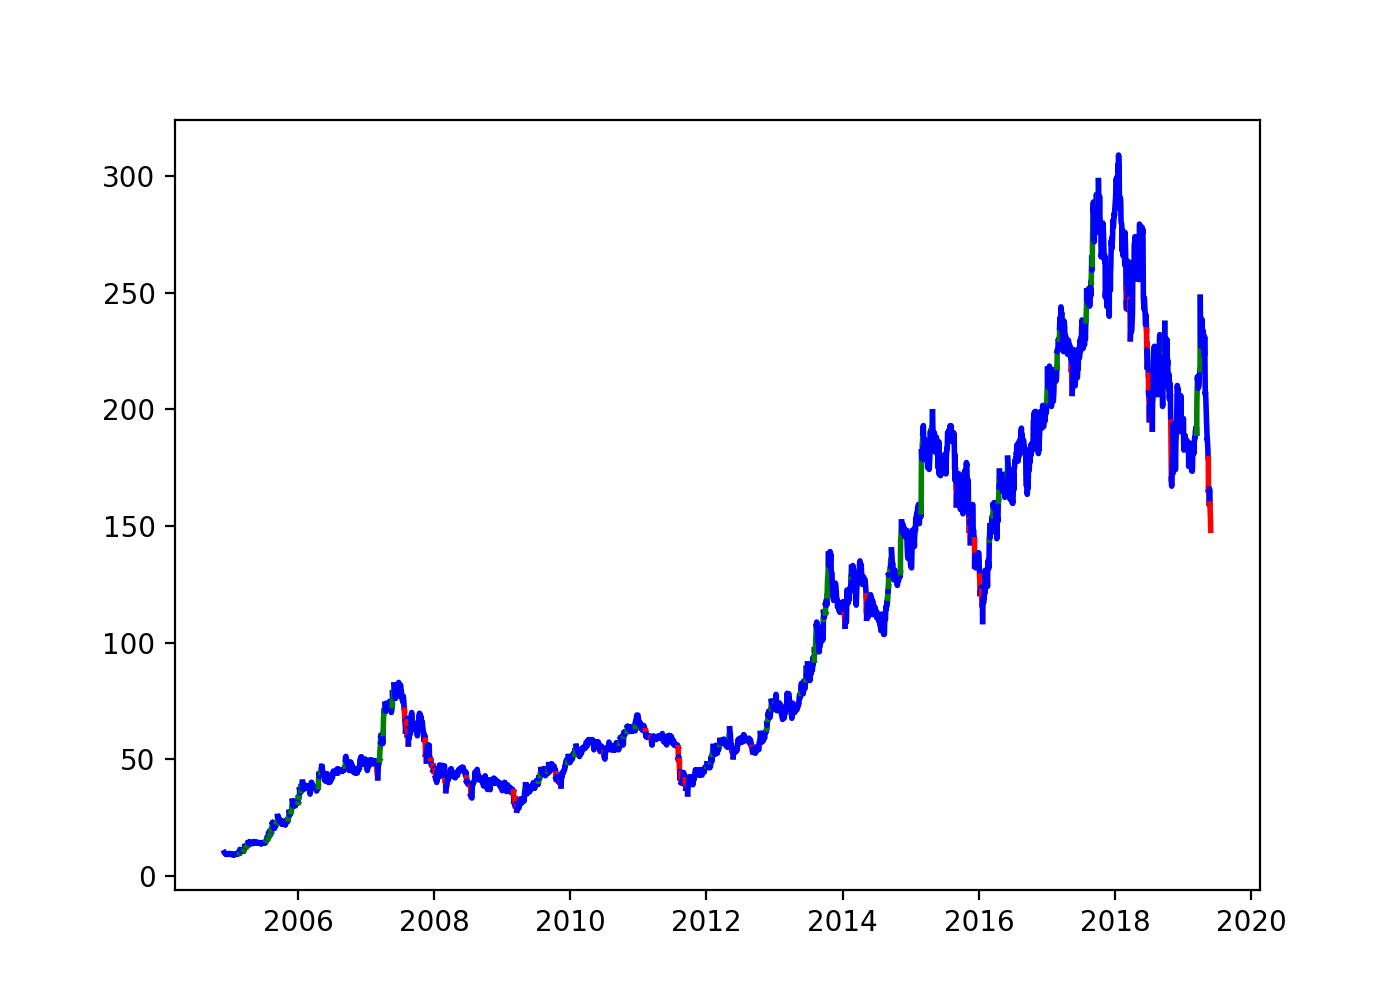

In [10]:
sg.plot_rule_results('filter_1', ts='close')

In [8]:
import backtester
import position_size
import results

<IPython.core.display.Javascript object>


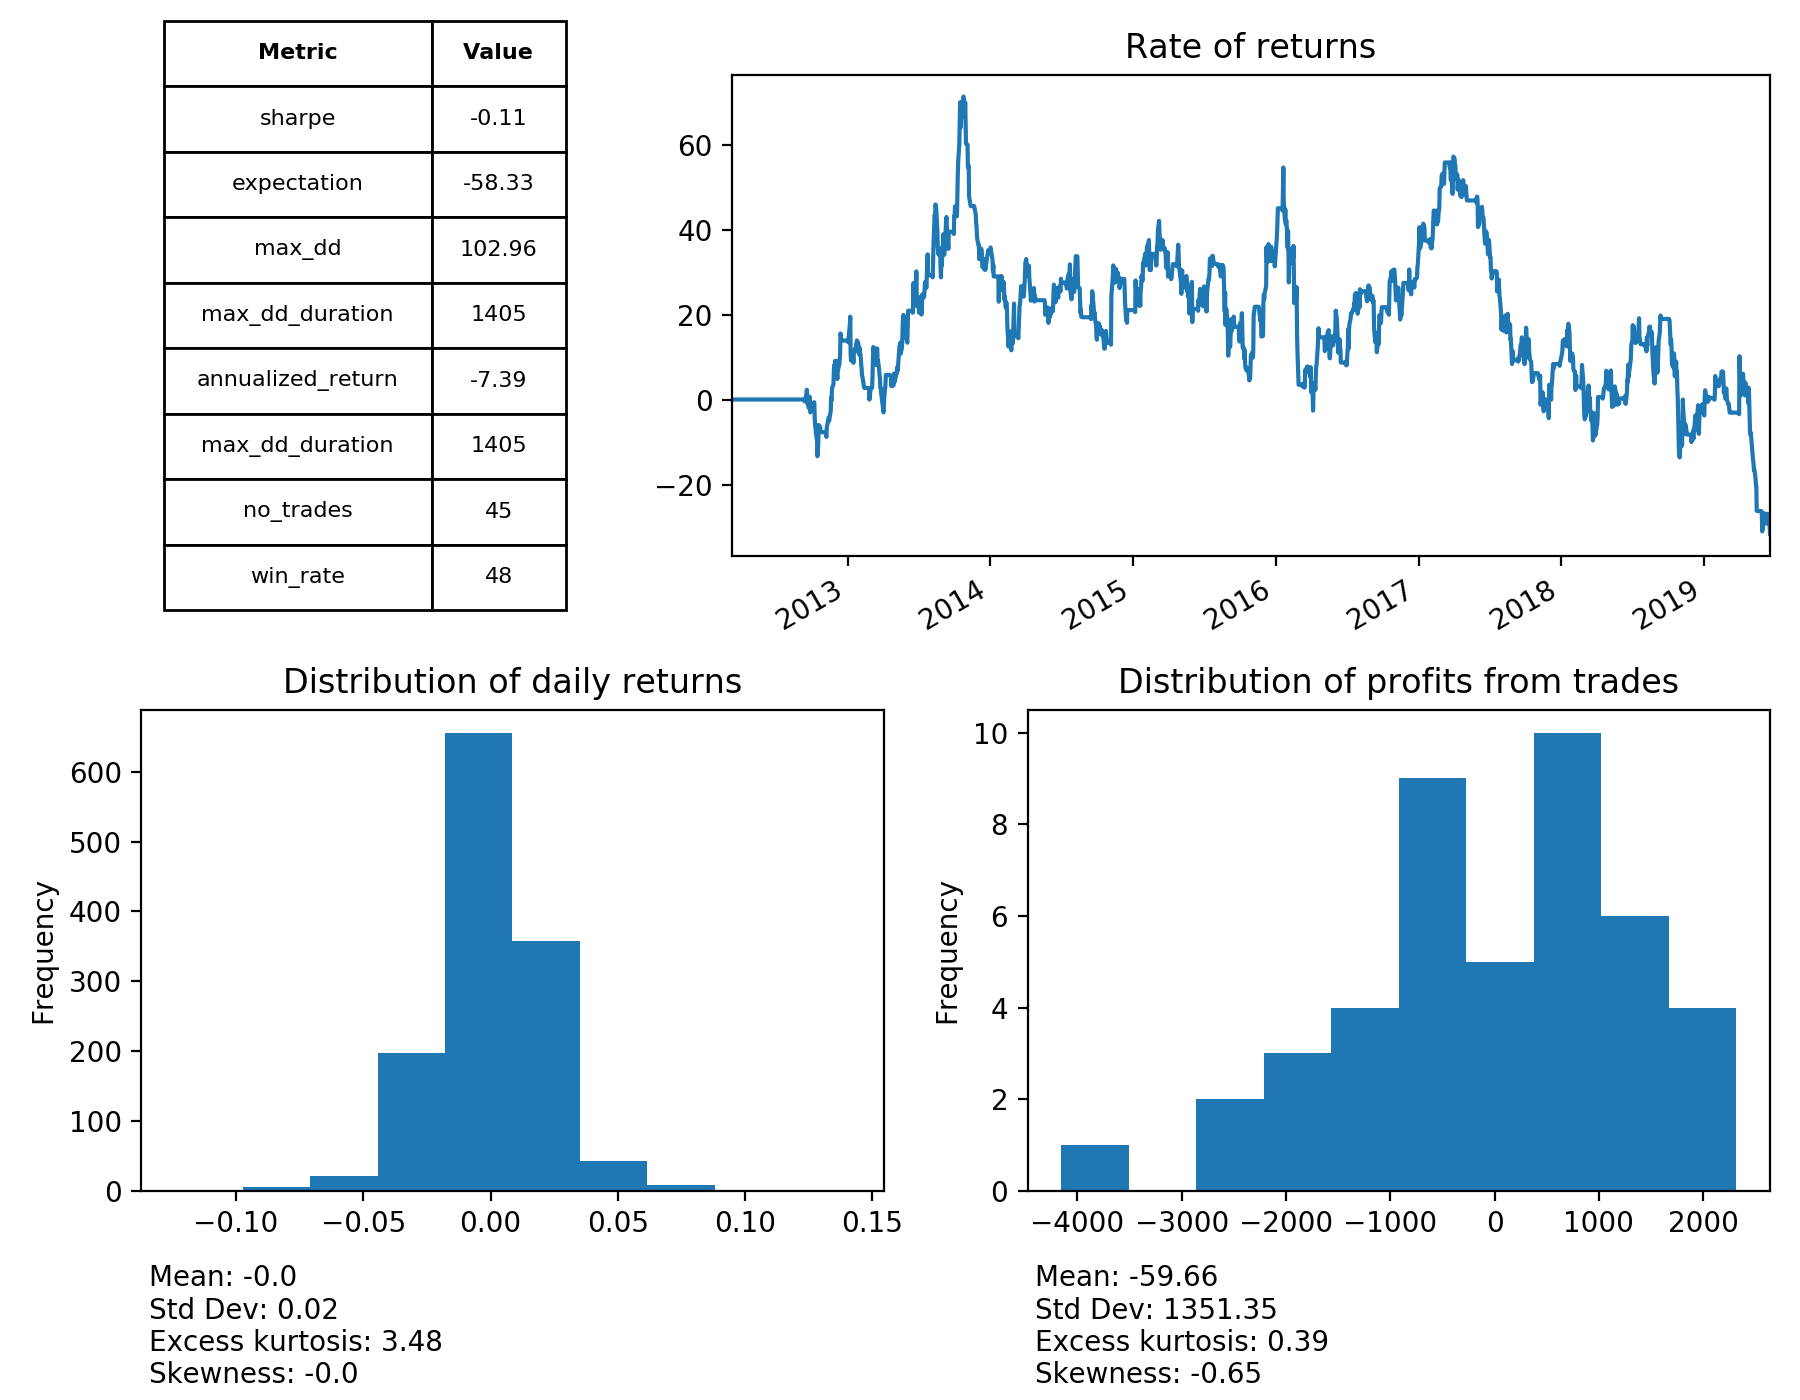

In [9]:
symbol = 'CCC'
pricing_data = {
    symbol: df
}
data_test, data_validation = data_collector.split_into_subsets(pricing_data, 0.5)
position_sizer = position_size.MaxFirstEncountered()

sg2 = signal_generator.SignalGenerator(
    df = data_validation[symbol],
    config = s3_config,
)
tester = backtester.Backtester(
    {symbol: sg2.generate()},
    position_sizer=position_sizer,
)
tester_results, tester_trades = tester.run()
results.performance_report(tester_results, tester_trades)

In [14]:
import csv
import ast

In [34]:
with open('/Users/slaw/osobiste/trading/filter_rule_opt_results_all.csv') as fh:
    reader = csv.reader(fh)
    next(reader)
    idx = 1
    results = []
    for row in reader:
        metrics = ast.literal_eval(row[1])
        results.append(
            (row[0], float(row[2]), metrics['expectation'], metrics['no_trades'],
             metrics['annualized_return'], metrics['max_dd_duration'])
        )

In [35]:
top_reults = sorted(results, key=lambda x: x[1], reverse=True)
for r in top_reults[:100]:
    print('sharpe: {}, expectation: {}, no_trades: {}, ret: {}, dd: {} -> params: {}'.format(
        round(r[1], 2), round(r[2], 2), r[3], round(r[4], 2), r[5], r[0],
    ))


sharpe: 0.91, expectation: 2605.61, no_trades: 6, ret: 20.9, dd: 1063 -> params: (56, 0.035, 7, 0.02, 28, 1, None)
sharpe: 0.91, expectation: 2605.61, no_trades: 6, ret: 20.9, dd: 1063 -> params: (56, 0.035, 14, 0.02, 28, 1, None)
sharpe: 0.91, expectation: 2605.61, no_trades: 6, ret: 20.9, dd: 1063 -> params: (56, 0.035, 28, 0.02, 28, 1, None)
sharpe: 0.91, expectation: 2605.61, no_trades: 6, ret: 20.9, dd: 1063 -> params: (56, 0.035, 56, 0.02, 28, 1, None)
sharpe: 0.88, expectation: 960.99, no_trades: 57, ret: 45.96, dd: 745 -> params: (56, 0.02, 7, 0.005, 28, 1, True)
sharpe: 0.88, expectation: 960.99, no_trades: 57, ret: 45.96, dd: 745 -> params: (56, 0.02, 7, 0.01, 28, 1, True)
sharpe: 0.88, expectation: 960.99, no_trades: 57, ret: 45.96, dd: 745 -> params: (56, 0.02, 7, 0.015, 28, 1, True)
sharpe: 0.88, expectation: 960.99, no_trades: 57, ret: 45.96, dd: 745 -> params: (56, 0.02, 7, 0.02, 28, 1, True)
sharpe: 0.88, expectation: 960.99, no_trades: 57, ret: 45.96, dd: 745 -> params